# What makes the movie successful? 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will aim to find the facotrs of the successful movie. The successful movie can be defined as having the most profit or the best rating so we will analyze in two perspectives - profit and rating. We will use The Movie Database(TMDB), which has 2 files; Movie credits data and Movie metadata. During analyzing the data, we will try to find out:  
- Does budget affect to the box office hit or the best rating? 
- Which director creates the most of the movie? does it relate to revenue or rating? 
- Who
- Can we say that the box office hit movies result in good ratings? 


<a id='wrangling'></a>
## Data Wrangling

### 1) Data Preparation 
> I imported all required libraries for reading data, analysing and visualizing data below. I would like to use plot.ly for personal practice, so I will add some plot.ly charts for the visualization. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json # I have already known that there is json data 
import statsmodels.formula.api as smf 

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
movies = pd.read_csv('/Users/sojung/Downloads/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('/Users/sojung/Downloads/tmdb-movie-metadata/tmdb_5000_credits.csv')

In [3]:
movies.head(4)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


In [4]:
movies.shape

(4803, 20)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
credits.head(4)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [7]:
credits.shape

(4803, 4)

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


### 2) General Properties

**Movies file has the following 20 columns for 4803 movies:**

- budget             
- genres: json data having genre id and name
    * id: genre id  
    * name: genre name   
- homepage: URL of the movie website               
- id: movie id corresponding to id in credits file                   
- keywords: json data having keyword id and keywords               
    * id - keyword id  
    * name - keyword name for the specific movie      
- original_language: language in which original movie was released      
- original_title: original title of the movie       
- overview: description of the movie             
- popularity: popularity rating of the movie              
- production_companies: json data having the production company name
    * id: production company id  
    * name: production company name for the specific movie          
- production_countries:json data having the production countries information 
    * iso_3166_1: ISO Code for the countries   
    * name: Country name where the moview was released  
- release_date: release date of the movie          
- revenue        
- runtime                 
- spoken_languages:json data 
    * iso_639_1: Code for the language     
    * name: language name  
- status: status of the movie - Released, Rumored, Post production                
- tagline                
- title                 
- vote_average - average vote rating of the movie           
- vote_count - how many people voted to the movie    

**Credits file has the 4 following columns for 4803 movies:**

- movie_id: corresponding to id in movies file
- title: title of the movie
- cast: json data having actor/actress names of the movie 
- crew: json data having crew members of the movie


### 3) Data Cleaning

> I will clean data in the following steps:
>
>1) Merge movies and credit data to form one single data. Join them with movie id.
>
>2) Change JSON objects like Genres, cast, crew, production companies, production_countries etc. in python way
>
>3) Create new features release year based on Release date

#### 3.1) Merge movies and credits dataframe into a single dataframe 

In [9]:
merged_df = pd.merge(left=movies,right=credits, left_on='id', right_on='movie_id', suffixes=('_left', '_right')) 

In [10]:
merged_df.shape

(4803, 24)

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_left              4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [12]:
# Both id and movie_id refers to movie_id. Also title_right and title_left refers to movie title
# So, drop the column 'id' and 'title_right' from merged_df and rename 'title_left' as title 
merged_df.drop(['id', 'title_right'], axis=1, inplace=True)
merged_df = merged_df.rename(columns={'title_left': 'title'})
merged_df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [13]:
#Copy the new dataframe and drop the columns that I will not use for the analysis. 
merged_copy = merged_df.copy() #for backup
merged_copy.drop(['movie_id', 'status', 'tagline', 'homepage', 'keywords', 'overview', 'spoken_languages','original_language', 'production_companies','title'], axis=1, inplace=True)

merged_copy.head(2)

,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [14]:
merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
vote_count              4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 487.8+ KB


#### 3.2) Parsing json format to python format - genres, cast, crew, production_countries
From JSON objects, 

1) Cast object contains all the names of actors/actress in the movie in importance order. I will only use the actor/actress that comes up at the first from the list. 

2) Crew object contins all the crew members in the movie. I have decided to extract only the name of the director of the movie.


In [15]:
#parsing the json format 
def parsed_column(column, key):
    result = []
    parsed_column = json.loads(column)
    for item in parsed_column:
      result.append(item[key])
    return result

#putting back parsed data into the dataframe
def replace_clean_column(dataframe, column_name):
    new_column_value = dataframe.apply(lambda row: 
                                 parsed_column(row[column_name], 'name'),
                                 axis = 1)#.apply(', '.join)
        
    dataframe[column_name] = new_column_value.replace()
    

replace_clean_column(merged_copy, 'genres')
replace_clean_column(merged_copy, 'cast')
replace_clean_column(merged_copy, 'production_countries')


In [16]:
#Create profit column
merged_copy['profit'] = merged_copy['revenue'] - merged_copy['budget']
merged_copy.head(4)

,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,[United States of America],2007-05-19,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000
2,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,[United States of America],2012-07-16,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099


In [17]:
#create another dataframe for cast column to take out the first name of the cast 
cast_df = merged_copy.copy()
cast_df.head(2)

,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,[United States of America],2007-05-19,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000


In [188]:
#Take out only the name of the first cast in the list. If it does not exist, it remains as None. 
first_cast = merged_copy.apply(lambda row: row['cast'][0] if len(row['cast']) else None, axis = 1)

#Replace the first cast values in 'cast' column 
cast_df['cast'] = first_cast.replace()
cast_df.head()

,cast,amount
0,Sam Worthington,1
1407,Elisha Cuthbert,1
1405,Adrien Brody,1
1404,Jean-Claude Van Damme,1
1403,Walter Matthau,1


In [19]:
#Taking out the only the name of the director. 
def get_director(row):
    list_of_crew = json.loads(row['crew'])
    director = None
    for crew_member in list_of_crew:
        if (crew_member['job'] == 'Director'):
            director = crew_member['name']
            
    return director
            
crew_df = merged_copy.copy()
first_crew = crew_df.apply(lambda row: get_director(row), axis = 1)

#Putting results into the 'crew' column
crew_df['crew'] = first_crew.replace()
crew_df.head(4)

,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,2550965087
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,[United States of America],2007-05-19,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,661000000
2,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,[United States of America],2012-07-16,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,834939099


In [20]:
# Count generes 
count_genres = {}

for row in merged_copy['genres']:
    for genre in row:
        if genre in count_genres:
            count_genres[genre] += 1
        else:
            count_genres[genre] = 1

#Create seperate genre dataframe 
genres_df = pd.DataFrame.from_dict(count_genres, orient='index').reset_index()
genres_df.columns = ['genres','amount']
print (genres_df)

             genres  amount
0            Action    1154
1         Adventure     790
2           Fantasy     424
3   Science Fiction     535
4             Crime     696
5             Drama    2297
6          Thriller    1274
7         Animation     234
8            Family     513
9           Western      82
10           Comedy    1722
11          Romance     894
12           Horror     519
13          Mystery     348
14          History     197
15              War     144
16            Music     185
17      Documentary     110
18          Foreign      34
19         TV Movie       8


In [21]:
#Create a pie chart using plot.ly 

labels = genres_df['genres']
values = genres_df['amount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

Drama is the most popular genre in the movie industry. It takes 18.9% of the movie genre followed by Comedy(14.2%). 

In [22]:
# Count production countries 
count_countries = {}

for row in merged_copy['production_countries']:
    for country in row:
        if country in count_countries:
            count_countries[country] += 1
        else:
            count_countries[country] = 1

#Create seperate countries dataframe 
countries_df = pd.DataFrame.from_dict(count_countries, orient='index').reset_index()
countries_df.columns = ['countries','amount']
print (countries_df)

                   countries  amount
0   United States of America    3956
1             United Kingdom     636
2                    Jamaica       2
3                    Bahamas       4
4                   Dominica       1
..                       ...     ...
83               Afghanistan       1
84                    Angola       1
85        Dominican Republic       1
86                  Cameroon       1
87                     Kenya       1

[88 rows x 2 columns]


In [23]:
#Create a pie chart with plot.ly

labels = countries_df['countries']
values = countries_df['amount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

United States is the dominant country in the movie production. US takes 61.5% of the movie production, which is over half of the industry. 

#### 3.3) Create Release year from release_date

In [24]:
merged_copy['release_date'] = pd.to_datetime(merged_copy['release_date']).apply(lambda x: x.date())
merged_copy['release_year'] = pd.to_datetime(merged_copy['release_date']).apply(lambda x: x.year)
merged_copy['release_year'] = merged_copy['release_year'].values.astype(int)

print(merged_copy['release_year'])

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_year, Length: 4803, dtype: int64


In [25]:
#We will use data after year 1920 
#source: https://www.kaggle.com/vikassingh1996/netflix-movies-and-shows-plotly-recommender-sys

movies_after_1920 = merged_copy['release_year'][merged_copy['release_year']>=1920]
movies_after_1920_df = pd.DataFrame(movies_after_1920)


movies_count = movies_after_1920_df['release_year'].value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = movies_count['index'],
                y = movies_count['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
                             
layout = go.Layout(template= "plotly_dark",title = 'MOVIE RELEASE OVER THE YEAR' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Amount'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

We see the highest number of movies were in the year 2009, with the number of movies being 247. From the end of the 90's, the amount of movies has been increased exponentially.

<a id='eda'></a>
## Exploratory Data Analysis

> I will answer the 5 remaining questions with using regression model, comparison, etc
>
>1) Does budget affect to the box hit?\
>2) Can we say that the box office hit movies have good ratings? \
>3) Which director creates the most of the movie? does it relate to revenue or rating? \
>4) Which actor/actress have been starred the most? does it relate to revenue or rating? \
>5) Does popularity leads to box office hit? or good rating? 

### Q1) Does budget affect to the box hit?
I will use regression model to figure out the relationship between budget and profit(also budget and revenue for comparison). 




In [26]:
budget_df = merged_copy[['release_year', 'budget','revenue','profit']]
budget_df.head()

,release_year,budget,revenue,profit
0,2009,237000000,2787965087,2550965087
1,2007,300000000,961000000,661000000
2,2015,245000000,880674609,635674609
3,2012,250000000,1084939099,834939099
4,2012,260000000,284139100,24139100


Text(0, 0.5, 'Revenue')

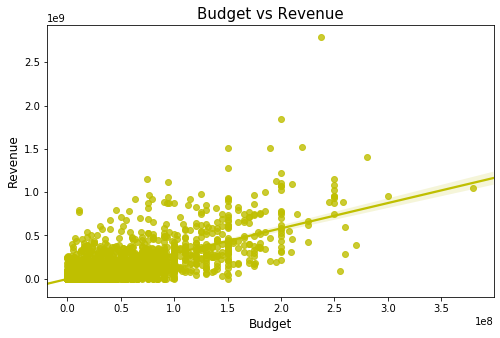

In [27]:
# The dependent variable(revenue) is plotted on the y-axis, while the independent variable(budget) is plotted on the x-axis.
f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x = 'budget', y = 'revenue', data=budget_df, color='y')
ax.set_title('Budget vs Revenue', fontsize=15)
ax.set_xlabel('Budget', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)

As the budget increases, the revenue of the movie seems likely to increase.

In [28]:
#regression between budget and revenue 
regression = smf.ols('budget ~ revenue ', data=budget_df).fit()

regression.rsquared

0.5341020482032328

There seems the positive relationship between budget and revenue, however, it does not seem to be strong. 
Let's see the relationship between budget and profit. 

Text(0, 0.5, 'Profit')

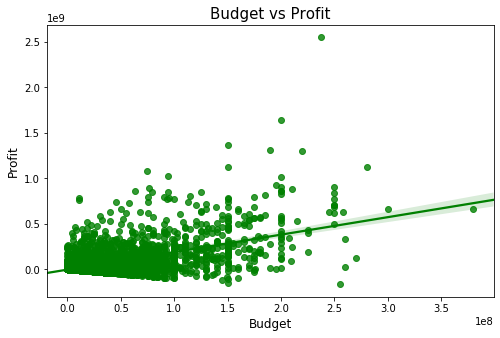

In [29]:
# Profit: y-axis, Budget: x-axis.
f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x = 'budget', y = 'profit', data=budget_df, color='g')
ax.set_title('Budget vs Profit', fontsize=15)
ax.set_xlabel('Budget', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)

In [30]:
#regression between budget and profit 
regression = smf.ols('budget ~ profit ', data=budget_df).fit()

regression.rsquared 

0.331605765489576

There is still positive relation between budget and profit but it is much smaller than budget and revenue. 
It seems there are other independent factors to profit. Before checking other independent factors(director or actor/actress, let's calculate weighted rating and see if it's related to the profit of the movie. 

### Q2)  Weighted Rating & Profit 
I will create the weighted rating from vote_average and vote_count to make ratings more reliable.\
For this, I will use weighted rating formular that is used in IMDB rating

>weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
>
>where:\
>R = average for the movie (mean) = (Rating)\
>v = number of votes for the movie = (votes)\
>m = minimum votes required to be listed in the Top 250 (currently 1250)\
>C = the mean vote across the whole report


In [65]:
#Create ranking dataframe from merged_copy
rank_df = crew_df.copy()

In [66]:
#Drop all rows and columns which have null values
rank_df.dropna()


,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,2550965087
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,[United States of America],2007-05-19,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,661000000
2,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,[United States of America],2012-07-16,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,834939099
4,260000000,"[Action, Adventure, Science Fiction]",John Carter,43.926995,[United States of America],2012-03-07,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",El Mariachi,14.269792,"[Mexico, United States of America]",1992-09-04,2040920,81.0,6.6,238,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,1820920
4799,9000,"[Comedy, Romance]",Newlyweds,0.642552,[],2011-12-26,0,85.0,5.9,5,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",Edward Burns,-9000
4800,0,"[Comedy, Drama, Romance, TV Movie]","Signed, Sealed, Delivered",1.444476,[United States of America],2013-10-13,0,120.0,7.0,6,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",Scott Smith,0
4801,0,[],Shanghai Calling,0.857008,"[United States of America, China]",2012-05-03,0,98.0,5.7,7,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",Daniel Hsia,0


In [67]:
# Create variables that match with the weighted rating formula
v = rank_df['vote_count']
R = rank_df['vote_average']
C = rank_df['vote_average'].mean()
m = rank_df['vote_count'].quantile(0.25) 
# Since IMDB uses minimum votes required to be listed in the Top 250, I assume that it's first quartile of votes. 

In [68]:
#Create new column 'weighted_rank'
rank_df['weighted_rank']=(v/(v + m)) * R + (m /(v + m)) * C
rank_df.head()

,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,profit,weighted_rank
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,2550965087,7.194953
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,[United States of America],2007-05-19,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,661000000,6.890421
2,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,635674609,6.297517
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,[United States of America],2012-07-16,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,834939099,7.591111
4,260000000,"[Action, Adventure, Science Fiction]",John Carter,43.926995,[United States of America],2012-03-07,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,24139100,6.099806


In [136]:
top10_rank = rank_df.sort_values(by='weighted_rank', ascending=False)[:11]
top10_rank

,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,profit,weighted_rank
1881,25000000,"[Drama, Crime]",The Shawshank Redemption,136.747729,[United States of America],1994-09-23,28341469,142.0,8.5,8205,"[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...",Frank Darabont,3341469,8.484257
3337,6000000,"[Drama, Crime]",The Godfather,143.659698,[United States of America],1972-03-14,245066411,175.0,8.4,5893,"[Marlon Brando, Al Pacino, James Caan, Richard...",Francis Ford Coppola,239066411,8.379044
662,63000000,[Drama],Fight Club,146.757391,"[Germany, United States of America]",1999-10-15,100853753,139.0,8.3,9413,"[Edward Norton, Brad Pitt, Meat Loaf, Jared Le...",David Fincher,37853753,8.287406
3232,8000000,"[Thriller, Crime]",Pulp Fiction,121.463076,[United States of America],1994-10-08,213928762,154.0,8.3,8428,"[John Travolta, Samuel L. Jackson, Uma Thurman...",Quentin Tarantino,205928762,8.285944
1818,22000000,"[Drama, History, War]",Schindler's List,104.469351,[United States of America],1993-11-29,321365567,195.0,8.3,4329,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...",Steven Spielberg,299365567,8.272799
3865,3300000,[Drama],Whiplash,192.528841,[United States of America],2014-10-10,13092000,105.0,8.3,4254,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",Damien Chazelle,9792000,8.272325
2294,15000000,"[Fantasy, Adventure, Animation, Family]",千と千尋の神隠し,118.968562,[Japan],2001-07-20,274925095,125.0,8.3,3840,"[Rumi Hiiragi, Miyu Irino, Mari Natsuki, Takas...",Hayao Miyazaki,259925095,8.269383
2731,13000000,"[Drama, Crime]",The Godfather: Part II,105.792936,[United States of America],1974-12-20,47542841,200.0,8.3,3338,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",Francis Ford Coppola,34542841,8.264852
65,185000000,"[Drama, Action, Crime, Thriller]",The Dark Knight,187.322927,"[United Kingdom, United States of America]",2008-07-16,1004558444,152.0,8.2,12002,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",Christopher Nolan,819558444,8.190559
809,55000000,"[Comedy, Drama, Romance]",Forrest Gump,138.133331,[United States of America],1994-07-06,677945399,142.0,8.2,7927,"[Tom Hanks, Robin Wright, Gary Sinise, Mykelti...",Robert Zemeckis,622945399,8.185738


In [138]:
top10_profit = rank_df.sort_values(by='profit', ascending=False)[:11]
top10_profit

,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,profit,weighted_rank
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,2550965087,7.194953
25,200000000,"[Drama, Romance, Thriller]",Titanic,100.025899,[United States of America],1997-11-18,1845034188,194.0,7.5,7562,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",James Cameron,1645034188,7.490018
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,418.708552,[United States of America],2015-06-09,1513528810,124.0,6.5,8662,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,1363528810,6.497473
44,190000000,[Action],Furious 7,102.322217,"[Japan, United States of America]",2015-04-01,1506249360,137.0,7.3,4176,"[Vin Diesel, Paul Walker, Dwayne Johnson, Mich...",James Wan,1316249360,7.284581
16,220000000,"[Science Fiction, Action, Adventure]",The Avengers,144.448633,[United States of America],2012-04-25,1519557910,143.0,7.4,11776,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",Joss Whedon,1299557910,7.394030
7,280000000,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,134.279229,[United States of America],2015-04-22,1405403694,141.0,7.3,6767,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,1125403694,7.290438
124,150000000,"[Animation, Adventure, Family]",Frozen,165.125366,[United States of America],2013-11-27,1274219009,102.0,7.3,5295,"[Kristen Bell, Idina Menzel, Jonathan Groff, J...",Jennifer Lee,1124219009,7.287807
546,74000000,"[Family, Animation, Adventure, Comedy]",Minions,875.581305,[United States of America],2015-06-17,1156730962,91.0,6.4,4571,"[Sandra Bullock, Jon Hamm, Michael Keaton, All...",Pierre Coffin,1082730962,6.396406
329,94000000,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Return of the King,123.630332,"[New Zealand, United States of America]",2003-12-01,1118888979,201.0,8.1,8064,"[Elijah Wood, Ian McKellen, Viggo Mortensen, L...",Peter Jackson,1024888979,8.086644
31,200000000,"[Action, Adventure, Science Fiction]",Iron Man 3,77.682080,"[China, United States of America]",2013-04-18,1215439994,130.0,6.8,8806,"[Robert Downey Jr., Gwyneth Paltrow, Don Chead...",Shane Black,1015439994,6.795686


In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=top10_rank.original_title,y=top10_rank.weighted_rank),
    row=1, col=1)


fig.add_trace(
    go.Bar(x=top10_profit.original_title, y=top10_profit.profit),
    row=1, col=2
)



fig.update_layout(height=600, width=800, title_text="Top 10 Movies")
fig.show()


### Q2) Does director would make a successful movie? 

In [146]:
count_director = {}

for director in crew_df.crew:
    if director in count_director:
        count_director[director] += 1
    else:
        count_director[director] = 1

#Create seperate countries dataframe 
directors_df = pd.DataFrame.from_dict(count_director, orient='index').reset_index()
directors_df.columns = ['director','amount']
directors_df.sort_values(['amount'], axis=0, ascending=False, inplace=True) 


In [150]:
top_directors = directors_df.loc[directors_df['amount'] > 10] 
top_directors.director
# #Top directors - Assuming that someone 
# trace1 = go.Bar(
#                 x = top20_directors['director'],
#                 y = top20_directors['amount'],
#                 marker = dict(color = 'rgb(153,255,153)',
#                               line=dict(color='rgb(0,0,0)',width=1.5)))
# layout = go.Layout(template= "plotly_dark",title = 'TOP 20 DIRECTORS' , xaxis = dict(title = 'Directors'), yaxis = dict(title = 'Count'))
# fig = go.Figure(data = [trace1], layout = layout)
# fig.show()

37         Steven Spielberg
702             Woody Allen
326          Clint Eastwood
47          Martin Scorsese
17             Ridley Scott
441               Spike Lee
196            Renny Harlin
148       Steven Soderbergh
77             Oliver Stone
42          Robert Zemeckis
274          Barry Levinson
23               Tim Burton
83               Ron Howard
130         Joel Schumacher
206          Brian De Palma
161              Tony Scott
26              Michael Bay
467        Robert Rodriguez
616             Kevin Smith
123          Chris Columbus
79               Shawn Levy
104          Richard Donner
423    Francis Ford Coppola
782       Richard Linklater
306          Peter Farrelly
495          Stephen Frears
5                 Sam Raimi
342              Rob Reiner
Name: director, dtype: object

In [155]:
#Check there are s
for crew in top10_profit.crew:
    if crew in top_directors.director:
        print(crew)
    else:
        print('There is no value')

There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value


In [190]:
count_cast = {}

for cast in cast_df.cast:
    if cast in count_cast:
        count_cast[cast] += 1
    else:
        count_cast[cast] = 1


#Create seperate countries dataframe 
casts_df = pd.DataFrame.from_dict(count_cast, orient='index').reset_index()
casts_df.columns = ['cast','amount']
casts_df.sort_values(['amount'], axis=0, ascending=False, inplace=True) 
casts_df

,cast,amount
63,Bruce Willis,27
19,Denzel Washington,24
13,Johnny Depp,23
88,Robert De Niro,23
124,Nicolas Cage,22
...,...,...
384,Ashton Kutcher,1
383,Taron Egerton,1
382,Scott Mechlowicz,1
381,Woody Harrelson,1


In [ ]:
top_directors = directors_df.loc[directors_df['amount'] > 10] 
top_directors.director
# #Top directors - Assuming that someone 
# trace1 = go.Bar(
#                 x = top20_directors['director'],
#                 y = top20_directors['amount'],
#                 marker = dict(color = 'rgb(153,255,153)',
#                               line=dict(color='rgb(0,0,0)',width=1.5)))
# layout = go.Layout(template= "plotly_dark",title = 'TOP 20 DIRECTORS' , xaxis = dict(title = 'Directors'), yaxis = dict(title = 'Count'))
# fig = go.Figure(data = [trace1], layout = layout)
# fig.show()

In [170]:
top_casts = cast_df.loc[cast_df['amount'] > 3] 
top_casts

,cast,amount


In [157]:
for crew in top10_rank.crew:
    if crew in top_directors.director:
        print(crew)
    else:
        print('There is no value')

There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value
There is no value


### Q3) Does actor/actress would make a successful movie? 